In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
import scipy.signal as sig
# Columns are datetime, upper temperature, lower temperature, heater temperature
frame = pd.read_csv('../data/2020.05.05/logger2/tree1_log.csv', usecols=[1,2,3])
# Since we're not actually using the date, we won't bother parsing it.
#print(frame)
len = 152 #Each pulse is 152 samples long
frame = frame.to_numpy()
#print(frame)

In [16]:
n = int(np.floor(frame.shape[0]/len))
print(F'Reshaping array to {n} x {len} x 3')
data = np.reshape(frame[0:(n*len),:], (n, len, 3))

Reshaping array to 368 x 152 x 3


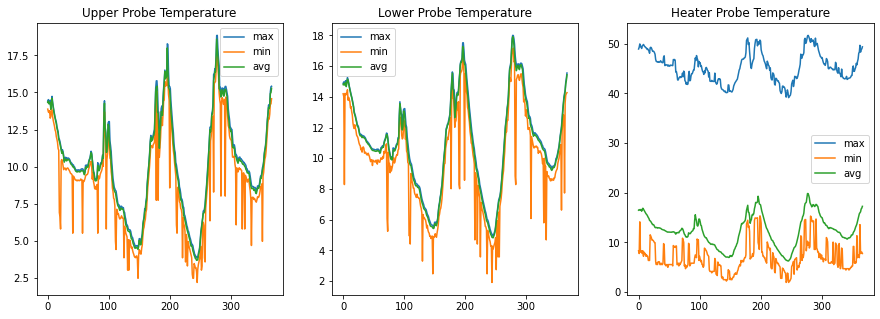

In [17]:
# Verify that our data is reasonable
maxes = data.max(axis=1)
mins = data.min(axis=1)
means = data.mean(axis=1)
plt.subplot(131)
plt.plot(maxes[:,0], label="max")
plt.plot(mins[:,0], label="min")
plt.plot(means[:,0], label="avg")
plt.title("Upper Probe Temperature")
plt.legend()
plt.subplot(132)
plt.plot(maxes[:,1], label="max")
plt.plot(mins[:,1], label="min")
plt.plot(means[:,1], label="avg")
plt.title("Lower Probe Temperature")
plt.legend()
plt.subplot(133)
plt.plot(maxes[:,2], label="max")
plt.plot(mins[:,2], label="min")
plt.plot(means[:,2], label="avg")
plt.title("Heater Probe Temperature")
plt.legend()
plt.show()

**Macro observations:**
- Temperature trends match between the probes, show daily cycle consistent with local weather conditions
- Heater increases 40C from min to max
- Minimum values show lots of noise. These are probably the first values as the probe turns on after sleeping. These could be lower due to the charging of filter capacitors.

In [18]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def examine(x):
    print(F'Plotting frame {x}')
    plt.subplot(121)
    plt.plot(data[x,:,0], label='Upper')
    plt.plot(data[x,:,1], label='Lower')
    plt.legend()
    plt.subplot(122)
    plt.plot(data[x,:,2], label='Heater')
    plt.legend()
    plt.show()
interact(examine, x=(0,n-1))

interactive(children=(IntSlider(value=183, description='x', max=367), Output()), _dom_classes=('widget-interac…

<function __main__.examine(x)>

**Observations**
- First few values appear to be from previous measurement
- Next few values are measured very low, probably due to filter capacitor charge-up
- Influence of heater pulse seems to be very minimal. Perhaps the probes need more insulation from the sun and wind?

<ipython-input-9-7ad55e4f74f8>:4: RuntimeWarning: divide by zero encountered in true_divide
  ratio = np.divide(delta[:,:,0],delta[:,:,1])
<ipython-input-9-7ad55e4f74f8>:4: RuntimeWarning: invalid value encountered in true_divide
  ratio = np.divide(delta[:,:,0],delta[:,:,1])
<ipython-input-9-7ad55e4f74f8>:8: RuntimeWarning: invalid value encountered in log
  flow = np.log(flow)


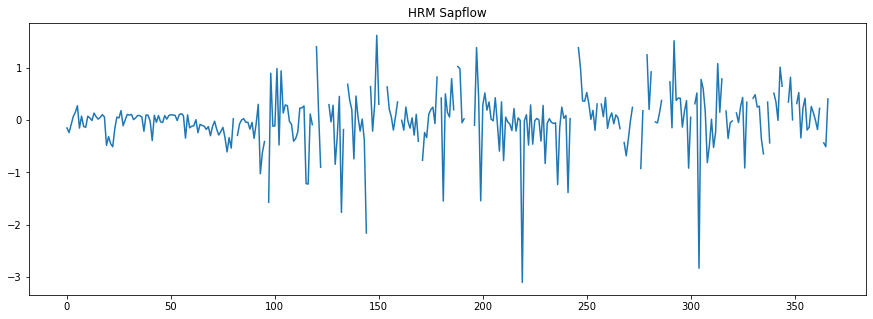

In [9]:
# Method from Burgess (2001)
baseline = data[:,0:9,:].max(axis=1)
delta = data - np.reshape(baseline, (-1,1,3))
ratio = np.divide(delta[:,:,0],delta[:,:,1])
# Start using the data 100 seconds after the heat pulse
# (The heat pulse finishes 13 seconds in)
flow = ratio[:,(100+13):].mean(axis=1)
flow = np.log(flow)
# We are supposed to also multiply by a constant scaling factor k/x * 3600
plt.plot(flow)
plt.title("HRM Sapflow")
plt.show()